In [3]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the 'scripts' folder to the Python path
sys.path.append(os.path.abspath('../scripts'))
# Import the preprocessing functions from preprocess_data.py

# Load the preprocessed datasets
processed_crashes_path = '../data/processed/processed_crashes.csv'
processed_crashes_data = pd.read_csv(processed_crashes_path)

processed_vehicle_data_path = '../data/processed/processed_vehicles.csv'
processed_vehicle_data = pd.read_csv(processed_vehicle_data_path)

processed_vehicle_data['PartyType_Code'] = processed_vehicle_data['PartyType_Code'].astype(int)

print("Preprocessing complete.")

Preprocessing complete.


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\1373040760.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


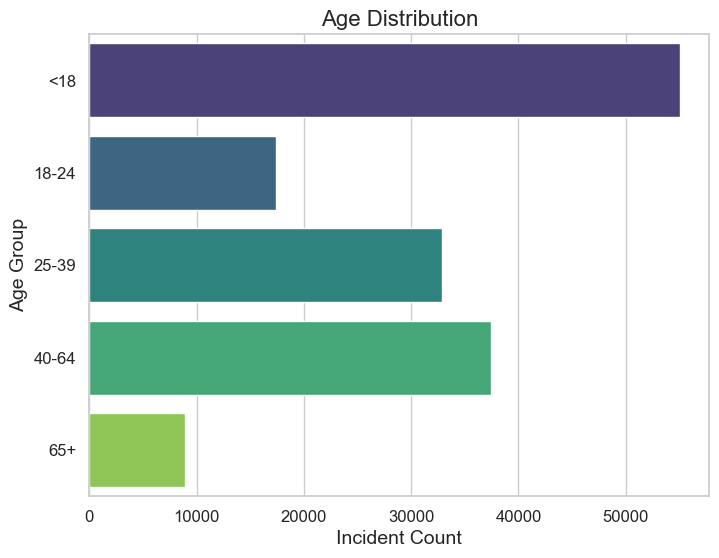

In [33]:
# Brian: Redefined age brackets for comparison of age-related risk factors
# Define function to categorize Age into brackets
def categorize_age(age):
    if age < 18:
        return '<18'
    elif 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 39:
        return '25-39'
    elif 40 <= age <= 64:
        return '40-64'
    else:
        return '65+'

# Apply the function to categorize Age
processed_vehicle_data['AgeBracket'] = processed_vehicle_data['Age'].apply(categorize_age)

# Specify the order of categories for AgeBracket
age_order = ['<18', '18-24', '25-39', '40-64', '65+']

# Visualize age bracket distribution
plt.figure(figsize=(8, 6))
sns.countplot(
    data=processed_vehicle_data,
    y='AgeBracket',
    order=age_order,
    palette='viridis'  # Apply the theme
)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Incident Count", fontsize=14)
plt.ylabel("Age Group", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\373706450.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


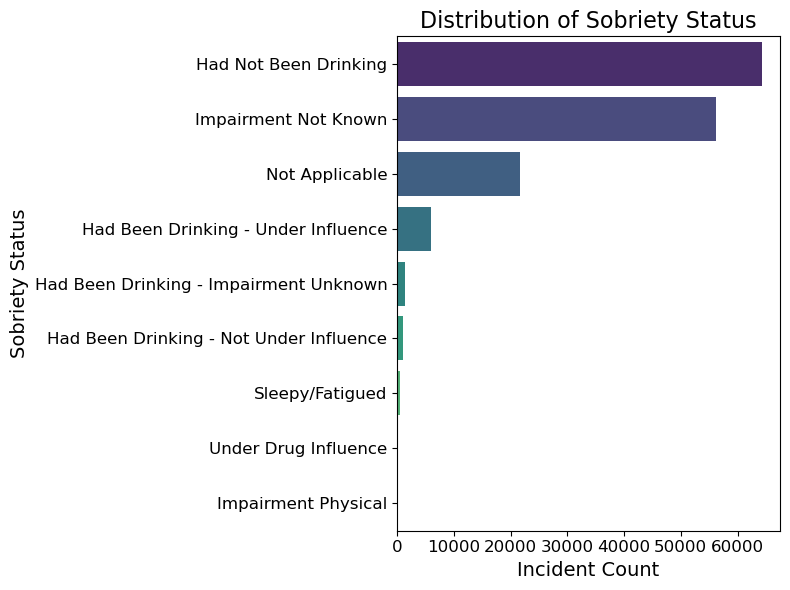

In [ ]:
# Set up the sobriety mapping for better labels
sobriety_mapping = {
    0: "Not Applicable",
    1: "Had Not Been Drinking",
    2: "Impairment Not Known",
    3: "Impairment Physical",
    4: "Sleepy/Fatigued",
    5: "Had Been Drinking - Not Under Influence",
    6: "Had Been Drinking - Impairment Unknown",
    7: "Had Been Drinking - Under Influence",
    8: "Under Drug Influence"
}

# Map sobriety codes to labels
processed_vehicle_data['Sobriety_Label'] = processed_vehicle_data['Sobriety_Code'].map(sobriety_mapping)

# Create a bar chart for sobriety distribution
plt.figure(figsize=(8, 6))
sns.countplot(
    data=processed_vehicle_data,
    y='Sobriety_Label',
    order=processed_vehicle_data['Sobriety_Label'].value_counts().index,
    palette='viridis'
)
plt.title("Distribution of Sobriety Status", fontsize=16)
plt.xlabel("Incident Count", fontsize=14)
plt.ylabel("Sobriety Status", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\1424005429.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


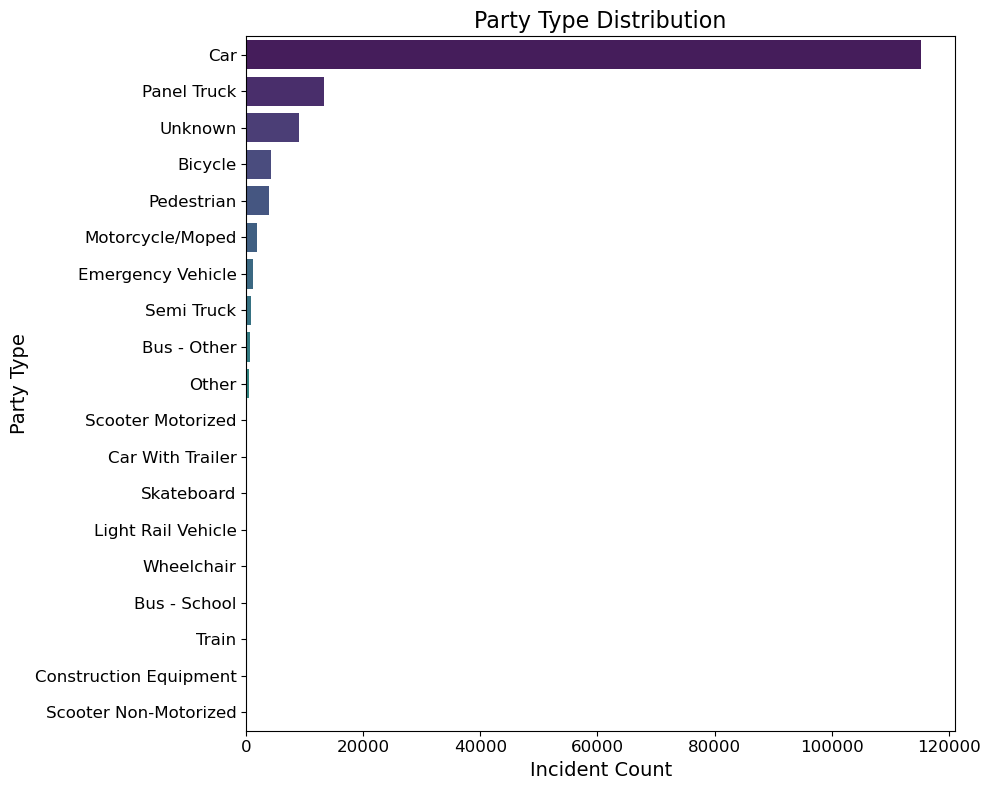

In [21]:
# Define a reverse mapping for PartyType_Code
party_type_reverse_mapping = {
    0: "Bicycle",
    1: "Bus - Other",
    2: "Bus - School",
    3: "Car",
    4: "Car With Trailer",
    5: "Construction Equipment",
    6: "Emergency Vehicle",
    7: "Light Rail Vehicle",
    8: "Motorcycle/Moped",
    9: "Panel Truck",
    10: "Pedestrian",
    11: "Scooter Motorized",
    12: "Scooter Non-Motorized",
    13: "Semi Truck",
    14: "Skateboard",
    15: "Train",
    16: "Wheelchair",
    17: "Other",
    18: "Unknown"
}

# Replace PartyType_Code with their corresponding labels
processed_vehicle_data['PartyType_Label'] = processed_vehicle_data['PartyType_Code'].map(party_type_reverse_mapping)

# Visualize Party Type Distribution with decoded labels
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.countplot(
    data=processed_vehicle_data,
    y='PartyType_Label',
    order=processed_vehicle_data['PartyType_Label'].value_counts().index,  # Sort by count
    palette='viridis'  # Add a consistent color palette
)
plt.title("Party Type Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Incident Count", fontsize=14)  # More descriptive x-axis label
plt.ylabel("Party Type", fontsize=14)  # More descriptive y-axis label
plt.xticks(fontsize=12)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.tight_layout()
plt.show()


count    73648.000000
mean        13.109915
std          6.322431
min          0.000000
25%          8.000000
50%         14.000000
75%         18.000000
max         23.000000
Name: CrashTime, dtype: float64


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\1575827195.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


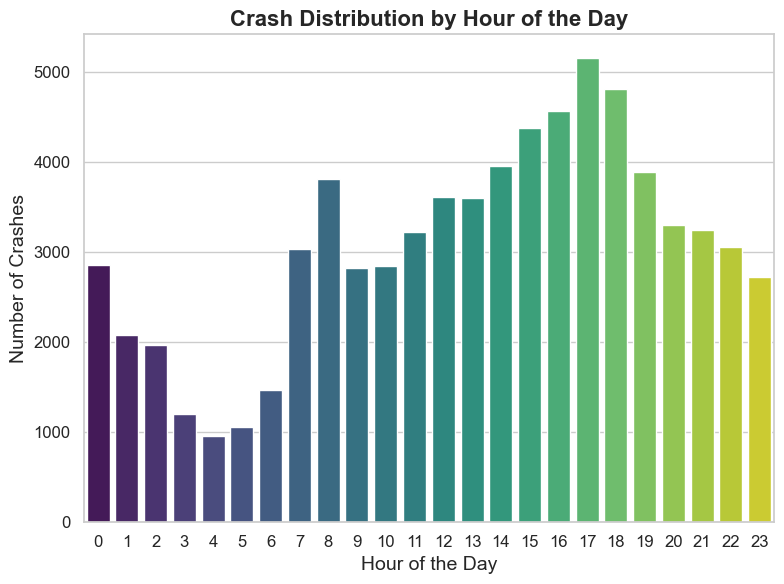

In [25]:
# Ensure the CrashHour column is already present in the dataset
if 'CrashTime' not in processed_crashes_data.columns:
    print("Error: 'CrashTime' column is missing in the dataset.")
else:
    # Verify CrashHour has valid numeric data
    print(processed_crashes_data['CrashTime'].describe())

    # Plot the distribution
    plt.figure(figsize=(8, 6))  # Adjust figure size
    sns.countplot(
        data=processed_crashes_data, 
        x='CrashTime', 
        order=range(24),  # Ensure x-axis has all hours 0-23
        palette="viridis"  # Apply desired theme
    )
    plt.title("Crash Distribution by Hour of the Day", fontsize=16, weight='bold')
    plt.xlabel("Hour of the Day", fontsize=14)
    plt.ylabel("Number of Crashes", fontsize=14)
    plt.xticks(range(24), fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ensure no clipping
    plt.show()

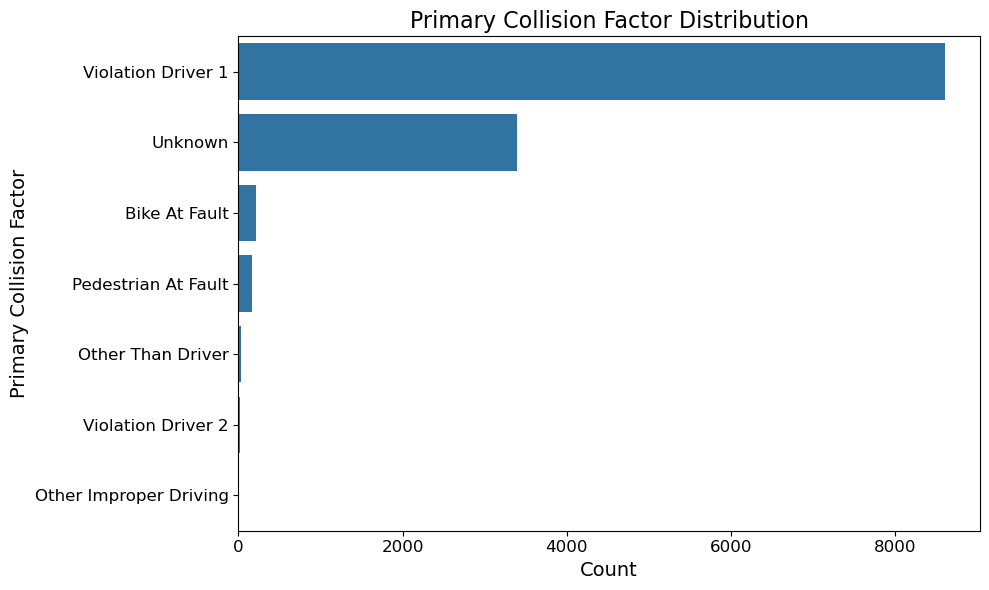

In [ ]:
# Visualize Primary Collision Factor Distribution
plt.figure(figsize=(10, 6))  # Increase figure size
sns.countplot(
    data=processed_crashes_data,
    y='PrimaryCollisionFactor',
    order=processed_crashes_data['PrimaryCollisionFactor'].value_counts().index
)
plt.title("Primary Collision Factor Distribution", fontsize=16)  # Larger font size for title
plt.xlabel("Count", fontsize=14)  # Larger font size for x-axis label
plt.ylabel("Primary Collision Factor", fontsize=14)  # Larger font size for y-axis label
plt.xticks(fontsize=12)  # Adjust font size for x-axis ticks
plt.yticks(fontsize=12)  # Adjust font size for y-axis ticks
plt.tight_layout()  # Ensure everything fits well
plt.show()

count        73648
unique           9
top       Rear End
freq         18394
Name: CollisionType_Label, dtype: object


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\130004907.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


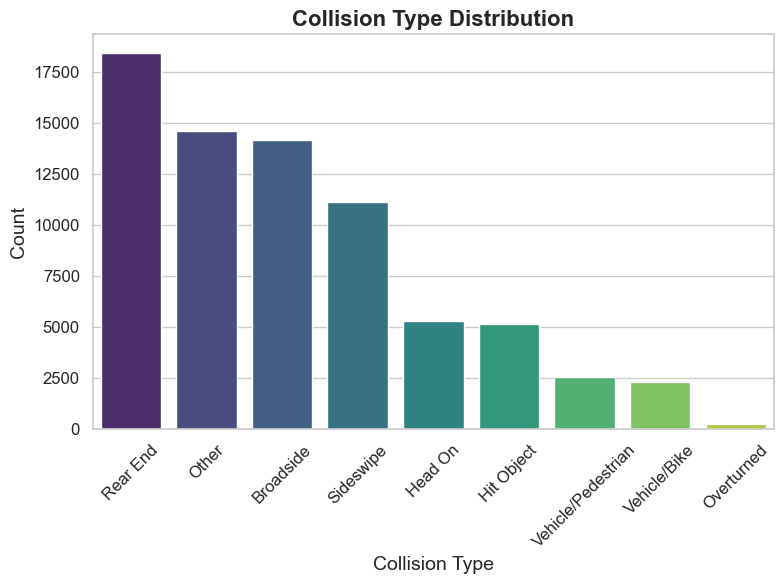

In [29]:
# Mapping for CollisionType
collision_type_mapping = {
    "Broadside": 0,
    "Head On": 1,
    "Hit Object": 2,
    "Other": 3,
    "Overturned": 4,
    "Rear End": 5,
    "Sideswipe": 6,
    "Vehicle/Bike": 7,
    "Vehicle/Pedestrian": 8
}

# Reverse mapping for labels
collision_type_reverse_mapping = {v: k for k, v in collision_type_mapping.items()}

# Apply mapping to create a column with human-readable labels
if 'CollisionType_Code' in processed_crashes_data.columns:
    processed_crashes_data['CollisionType_Label'] = processed_crashes_data['CollisionType_Code'].map(collision_type_reverse_mapping)

# Check if mapping succeeded
if 'CollisionType_Label' not in processed_crashes_data.columns:
    print("Error: CollisionType_Label column was not created.")
else:
    # Validate and summarize CollisionType_Label data
    print(processed_crashes_data['CollisionType_Label'].describe())

    # Create a vertical bar chart for CollisionType distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(
        data=processed_crashes_data,
        x='CollisionType_Label',
        order=processed_crashes_data['CollisionType_Label'].value_counts().index,  # Order by count
        palette="viridis"  # Apply the viridis theme
    )
    plt.title("Collision Type Distribution", fontsize=16, weight='bold')
    plt.xlabel("Collision Type", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


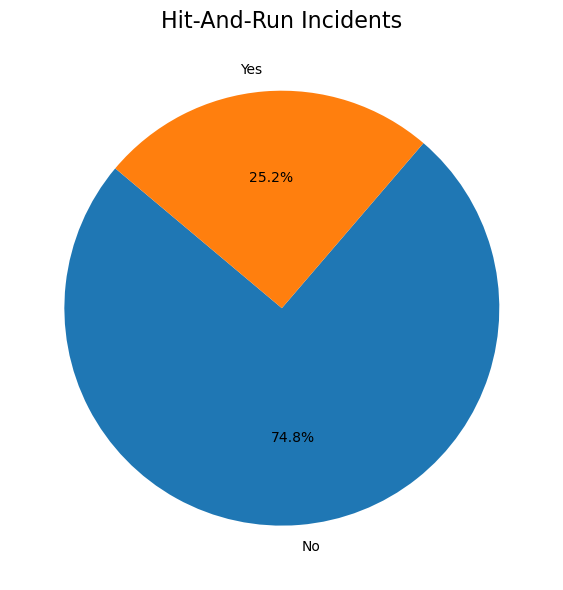

In [ ]:
# Map 0 and 1 to meaningful labels
hit_and_run_labels = {0: 'No', 1: 'Yes'}
processed_crashes_data['HitAndRun_Label'] = processed_crashes_data['HitAndRunFlag'].map(hit_and_run_labels)

# Create a pie chart for HitAndRunFlag
plt.figure(figsize=(6, 6))
hit_and_run_counts = processed_crashes_data['HitAndRun_Label'].value_counts()
hit_and_run_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=hit_and_run_counts.index)
plt.title("Hit-And-Run Incidents", fontsize=16)
plt.ylabel("")  # Remove y-axis label for cleaner presentation
plt.tight_layout()
plt.show()

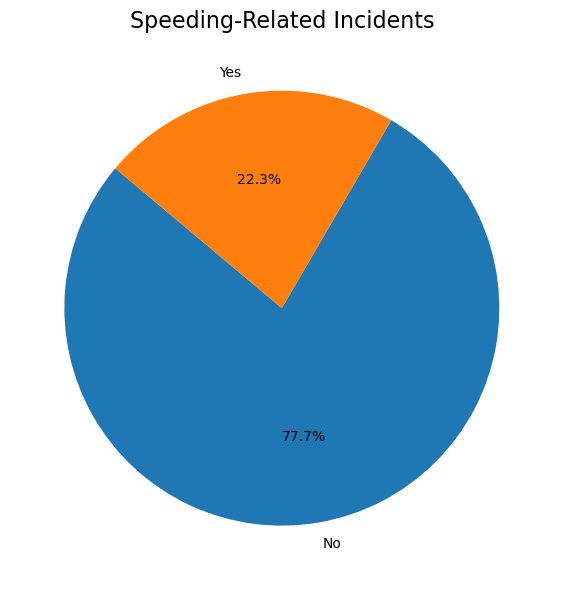

In [ ]:
# Map 0 and 1 to meaningful labels
speeding_labels = {0: 'No', 1: 'Yes'}
processed_crashes_data['Speeding_Label'] = processed_crashes_data['SpeedingFlag'].map(speeding_labels)

# Create a pie chart for SpeedingFlag
plt.figure(figsize=(6, 6))
speeding_counts = processed_crashes_data['Speeding_Label'].value_counts()
speeding_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=speeding_counts.index)
plt.title("Speeding-Related Incidents", fontsize=16)
plt.ylabel("")  # Remove y-axis label for cleaner presentation
plt.tight_layout()
plt.show()

count      151638
unique          5
top       Unknown
freq        58972
Name: VehicleDamage_Label, dtype: object


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\1948510600.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


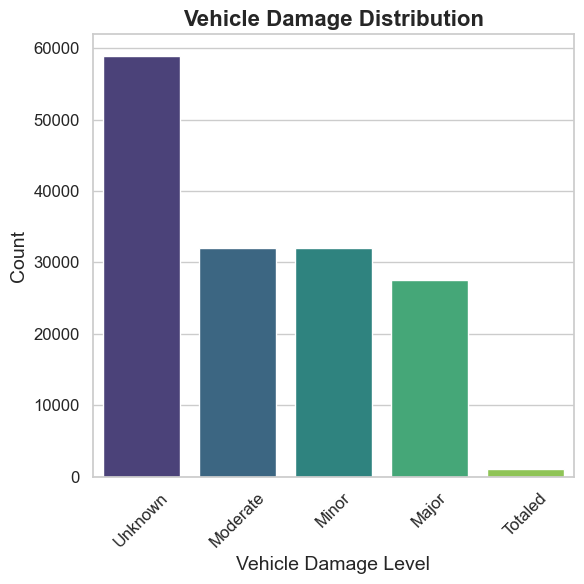

In [31]:
# Mapping for VehicleDamage
vehicle_damage_mapping = {
    "None": 0,
    "Minor": 1,
    "Moderate": 2,
    "Major": 3,
    "Totaled": 4,
    "Unknown": 5
}

# Reverse mapping for labels
vehicle_damage_reverse_mapping = {v: k for k, v in vehicle_damage_mapping.items()}

# Apply mapping to create a column with human-readable labels
if 'VehicleDamage_Code' in processed_vehicle_data.columns:
    processed_vehicle_data['VehicleDamage_Label'] = processed_vehicle_data['VehicleDamage_Code'].map(vehicle_damage_reverse_mapping)

# Check if mapping succeeded
if 'VehicleDamage_Label' not in processed_vehicle_data.columns:
    print("Error: VehicleDamage_Label column was not created.")
else:
    # Validate and summarize VehicleDamage_Label data
    print(processed_vehicle_data['VehicleDamage_Label'].describe())

    # Create a vertical bar chart for Vehicle Damage distribution
    plt.figure(figsize=(6, 6))
    sns.countplot(
        data=processed_vehicle_data,
        x='VehicleDamage_Label',
        order=processed_vehicle_data['VehicleDamage_Label'].value_counts().index,  # Order by count
        palette="viridis"  # Apply the viridis theme
    )
    plt.title("Vehicle Damage Distribution", fontsize=16, weight='bold')
    plt.xlabel("Vehicle Damage Level", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


count                  151638
unique                      9
top       Proceeding Straight
freq                    62444
Name: MovementPrecedingCollision_Label, dtype: object


C:\Users\lucas\AppData\Local\Temp\ipykernel_10712\688036419.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


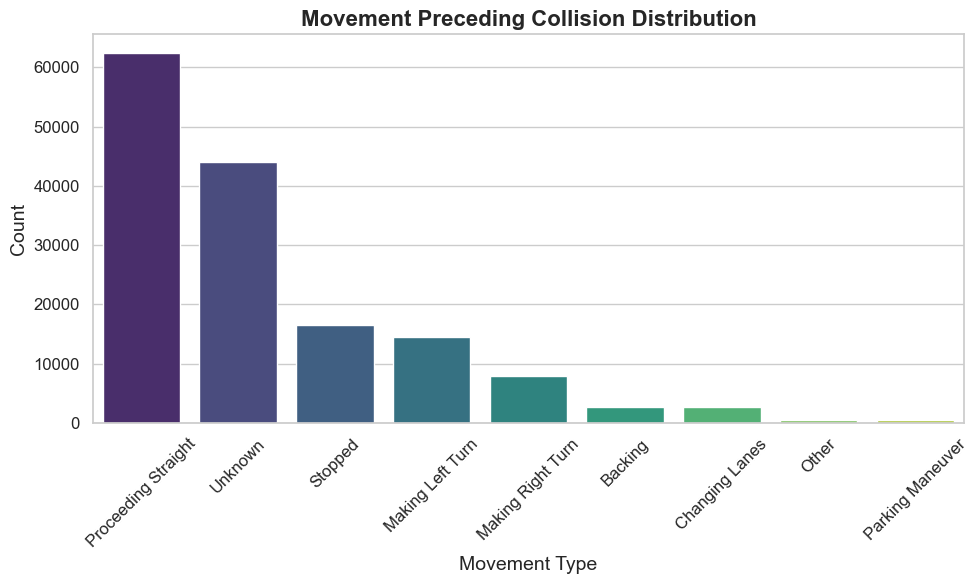

In [32]:
# Mapping for MovementPrecedingCollision
movement_preceding_collision_mapping = {
    "Proceeding Straight": 0,
    "Making Right Turn": 1,
    "Making Left Turn": 2,
    "Backing": 3,
    "Parking Maneuver": 4,
    "Changing Lanes": 5,
    "Overtaking/Passing": 6,
    "U-Turn": 7,
    "Stopped": 8,
    "Other": 9,
    "Unknown": 10
}

# Reverse mapping for labels
movement_preceding_collision_reverse_mapping = {v: k for k, v in movement_preceding_collision_mapping.items()}

# Apply mapping to create a column with human-readable labels
if 'MovementPrecedingCollision_Code' in processed_vehicle_data.columns:
    processed_vehicle_data['MovementPrecedingCollision_Label'] = processed_vehicle_data['MovementPrecedingCollision_Code'].map(
        movement_preceding_collision_reverse_mapping
    )

# Validate if mapping succeeded
if 'MovementPrecedingCollision_Label' not in processed_vehicle_data.columns:
    print("Error: MovementPrecedingCollision_Label column was not created.")
else:
    # Validate and summarize MovementPrecedingCollision_Label data
    print(processed_vehicle_data['MovementPrecedingCollision_Label'].describe())

    # Create a vertical bar chart for Movement Preceding Collision distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(
        data=processed_vehicle_data,
        x='MovementPrecedingCollision_Label',
        order=processed_vehicle_data['MovementPrecedingCollision_Label'].value_counts().index,  # Order by count
        palette="viridis"  # Apply viridis theme
    )
    plt.title("Movement Preceding Collision Distribution", fontsize=16, weight='bold')
    plt.xlabel("Movement Type", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)
    plt.tight_layout()  # Ensure everything fits well
    plt.show()
